### Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import re

from nltk.stem import WordNetLemmatizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras import Sequential
from keras import layers
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

### Read the dataset

In [2]:
df=pd.read_csv(r'C:\Users\Lenovo\Downloads\Deep learning\capstone project\movie\movie_data (1).csv')

In [3]:
df.head()

,review,sentiment
0,This movie is just crap. Even though the direc...,0
1,Another detailed work on the subject by Dr Dwi...,1
2,THE CAT O'NINE TAILS (Il Gatto a Nove Code) <b...,0
3,"Like with any movie genre, there are good gang...",0
4,I watched it with my mom and we were like...<b...,0


### Save only a portion of the dataset

In [4]:
df=df[0:1000]

In [5]:
df.head()

,review,sentiment
0,This movie is just crap. Even though the direc...,0
1,Another detailed work on the subject by Dr Dwi...,1
2,THE CAT O'NINE TAILS (Il Gatto a Nove Code) <b...,0
3,"Like with any movie genre, there are good gang...",0
4,I watched it with my mom and we were like...<b...,0


### Check Info

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     1000 non-null   object
 1   sentiment  1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


### View basic statistical information about the dataset

In [7]:
df.describe()

,sentiment
count,1000.000000
mean,0.501000
std,0.500249
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


### Check for missing values

In [8]:
df.isna().sum()

review       0
sentiment    0
dtype: int64

### Check for duplicates

In [9]:
df.duplicated().sum()

0

### Plot a countplot of the Class Index

<Axes: xlabel='count', ylabel='sentiment'>

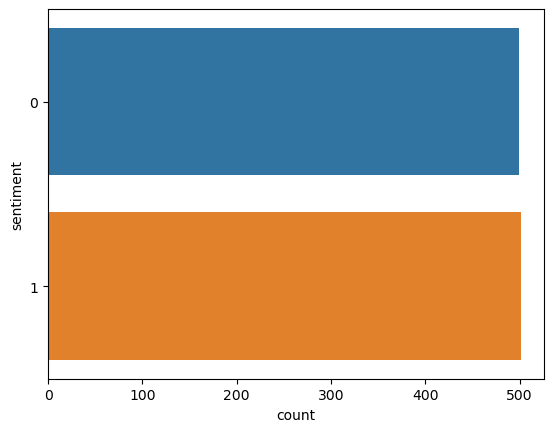

In [10]:
sns.countplot(y=df['sentiment'])

### Create a funciton to preprocess the text

In [11]:
def preprocess(sentence):
    text = re.sub(r"[^a-zA-Z0-9]"," ",sentence).split()
    
    words = [x.lower() for x in text ]
    
    lemma = WordNetLemmatizer()
    word = [lemma.lemmatize(word,'v') for word in words ]
    word = ' '.join(word)
    return word

### Apply the preprocess function to the description

In [12]:
df['review']=df['review'].apply(preprocess)

In [13]:
for i in range(5):
    print(df['review'][i],'--',df['sentiment'][i])
    print()

this movie be just crap even though the directors claim to be part of that oi culture it s still a very very bad directorial debut the topic itself be very interest and i accept the bad act due to the fact that they be all amateurs and never act before but the worst thing about this film be the dialogs and very unexperienced and naive direct there s no time at all in that movie i felt like the directors be so exit to do that movie it s their first feature that they actually never really ask themselves what story they wanna tell i meet ben one of the directors on several occasion and he s a nice and thoughtful guy but that doesn t make him a director i think that american history x be full of clich s but somehow manage to transport a story oi warn be full of clich s doesn t tell anything new or provocative and that s the sad thing about this movie it s far from any oi reality br br if you wanna see weird but great german film watch the movies of michael haneke christoph schlingensief os

### Split Input & Target Variables

In [14]:
X=df['review']
y=df['sentiment']

### Split the dataset into Training & Testing Set

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

### Create a keras Tokenizer object

In [16]:
tokenizer = Tokenizer(num_words=5000)

### fit on text for our X

In [17]:
tokenizer.fit_on_texts(X)

In [18]:
vocab_size = len(tokenizer.word_index) + 1

### Create a function to convert text to numerical representation and add padding

In [19]:
def text(txt):
    encode = tokenizer.texts_to_sequences(txt)
    padded_sequence = pad_sequences(encode, maxlen=128)    
       
    return padded_sequence

### Apply the function to our X_train & X_test

In [20]:
X_train=text(X_train)
X_test=text(X_test)

### Create keras Sequential model with GRU Layers

In [23]:
model=Sequential()

In [24]:
model.add(layers.Embedding(vocab_size, 128))

model.add(layers.GRU(128,  return_sequences=True))
model.add(layers.Dropout(0.2))

model.add(layers.GRU(128))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(1, activation='sigmoid'))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         1901824   
                                                                 
 gru (GRU)                   (None, None, 128)         99072     
                                                                 
 dropout (Dropout)           (None, None, 128)         0         
                                                                 
 gru_1 (GRU)                 (None, 128)               99072     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0

### Compile the model

In [26]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

### Train the model with our Training Set

In [27]:
model.fit(X_train,y_train,epochs=10,validation_split=0.05)

Epoch 1/10
24/24 [==============================] - 11s 266ms/step - loss: 0.6930 - accuracy: 0.4987 - val_loss: 0.6916 - val_accuracy: 0.5000
Epoch 2/10
24/24 [==============================] - 5s 228ms/step - loss: 0.6191 - accuracy: 0.6921 - val_loss: 0.6793 - val_accuracy: 0.6500
Epoch 3/10
24/24 [==============================] - 5s 225ms/step - loss: 0.2773 - accuracy: 0.8842 - val_loss: 0.8818 - val_accuracy: 0.5750
Epoch 4/10
24/24 [==============================] - 5s 226ms/step - loss: 0.1026 - accuracy: 0.9671 - val_loss: 1.3872 - val_accuracy: 0.6000
Epoch 5/10
24/24 [==============================] - 5s 223ms/step - loss: 0.0267 - accuracy: 0.9961 - val_loss: 1.4246 - val_accuracy: 0.6250
Epoch 6/10
24/24 [==============================] - 5s 222ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 2.2653 - val_accuracy: 0.6000
Epoch 7/10
24/24 [==============================] - 5s 228ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 2.7435 - val_accuracy: 0.5750
Epoch

### Make predictions with Test set

In [28]:
y_pred=model.predict(X_test)

7/7 [==============================] - 1s 59ms/step


In [30]:
y_pred=[np.argmax(i) for i in y_pred]

### Check accuracy score

In [37]:
accuracy_score(y_test,y_pred)

0.48

### Confusion matrix

<Axes: >

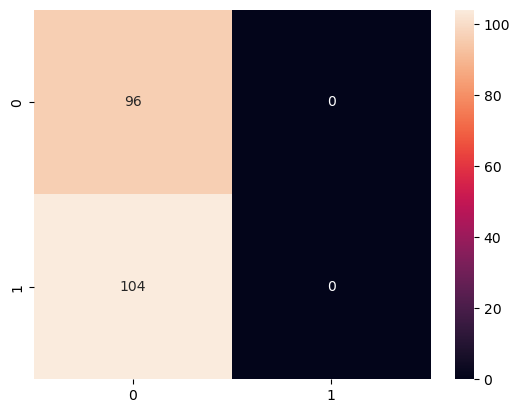

In [33]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')

### Classification Report

In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.48      1.00      0.65        96
           1       0.00      0.00      0.00       104

    accuracy                           0.48       200
   macro avg       0.24      0.50      0.32       200
weighted avg       0.23      0.48      0.31       200



C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


***